In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
import pickle
import warnings 

In [5]:
laptop_df = pd.read_csv('laptops.csv')
laptop_columns = laptop_df.columns
laptop_columns # among all the columns all are input ,Price is output 
# laptop_df

Index(['index', 'brand', 'Model', 'Price', 'Rating', 'processor_brand',
       'processor_tier', 'num_cores', 'num_threads', 'ram_memory',
       'primary_storage_type', 'primary_storage_capacity',
       'secondary_storage_type', 'secondary_storage_capacity', 'gpu_brand',
       'gpu_type', 'is_touch_screen', 'display_size', 'resolution_width',
       'resolution_height', 'OS', 'year_of_warranty'],
      dtype='object')

In [6]:
laptop_df.shape

(991, 22)

In [9]:
laptop_df.dtypes # find the datatype of each column

index                           int64
brand                          object
Model                          object
Price                           int64
Rating                          int64
processor_brand                object
processor_tier                 object
num_cores                       int64
num_threads                     int64
ram_memory                      int64
primary_storage_type           object
primary_storage_capacity        int64
secondary_storage_type         object
secondary_storage_capacity      int64
gpu_brand                      object
gpu_type                       object
is_touch_screen                  bool
display_size                  float64
resolution_width                int64
resolution_height               int64
OS                             object
year_of_warranty               object
dtype: object

In [6]:
def calculate_missing_values_in_each_column():
    columns_having_null = {}
    for column in laptop_df.columns:
        y = laptop_df[column].isnull().sum()
        columns_having_null[column] = y
    return columns_having_null
calculate_missing_values_in_each_column()
# we came to know that there is no missing values in the laptop dataset

{'index': 0,
 'brand': 0,
 'Model': 0,
 'Price': 0,
 'Rating': 0,
 'processor_brand': 0,
 'processor_tier': 0,
 'num_cores': 0,
 'num_threads': 0,
 'ram_memory': 0,
 'primary_storage_type': 0,
 'primary_storage_capacity': 0,
 'secondary_storage_type': 0,
 'secondary_storage_capacity': 0,
 'gpu_brand': 0,
 'gpu_type': 0,
 'is_touch_screen': 0,
 'display_size': 0,
 'resolution_width': 0,
 'resolution_height': 0,
 'OS': 0,
 'year_of_warranty': 0}

In [7]:
laptop_df.isnull().sum() # returns the same as above 

index                         0
brand                         0
Model                         0
Price                         0
Rating                        0
processor_brand               0
processor_tier                0
num_cores                     0
num_threads                   0
ram_memory                    0
primary_storage_type          0
primary_storage_capacity      0
secondary_storage_type        0
secondary_storage_capacity    0
gpu_brand                     0
gpu_type                      0
is_touch_screen               0
display_size                  0
resolution_width              0
resolution_height             0
OS                            0
year_of_warranty              0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x24e8ed67950>,
 'caps': [<matplotlib.lines.Line2D at 0x24e8e9e9b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24e8ef0f650>],
 'medians': [<matplotlib.lines.Line2D at 0x24e8ef52090>],
 'fliers': [<matplotlib.lines.Line2D at 0x24e8eba7dd0>],
 'means': []}

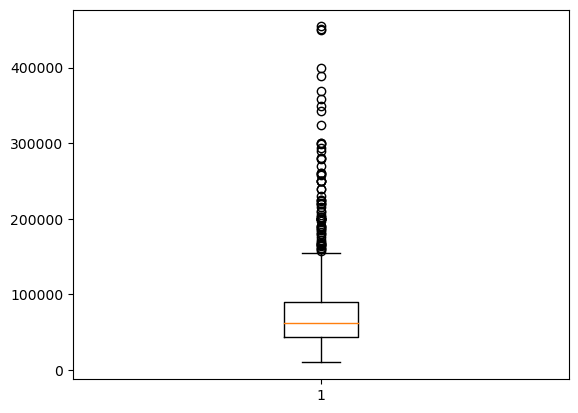

In [10]:
plt.boxplot(laptop_df['Price']) 
# In the Figure we came to know that all the values are high value outlier so we will pass that to the logarithumic distrbution

C:\Users\pbandi\AppData\Local\Temp\ipykernel_1368\2900327750.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop_df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

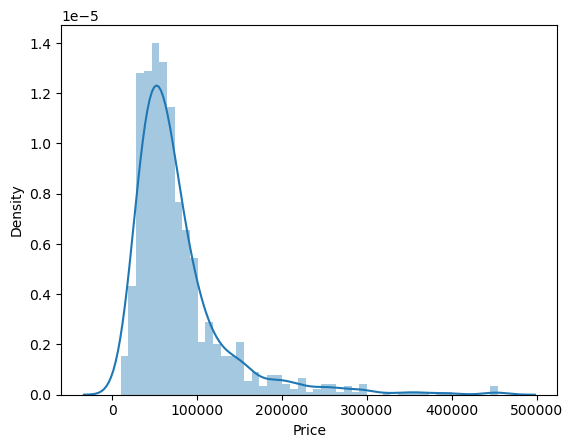

In [9]:
sns.distplot(laptop_df['Price'])

In [10]:
laptop_df['Price'].describe()

count       991.000000
mean      77266.504541
std       57384.910269
min        9800.000000
25%       43595.000000
50%       61900.000000
75%       89245.000000
max      454490.000000
Name: Price, dtype: float64

In [11]:
remove_outlier_from_output = laptop_df['Price'] = laptop_df['Price'].apply(np.log)


C:\Users\pbandi\AppData\Local\Temp\ipykernel_1368\2900327750.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(laptop_df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

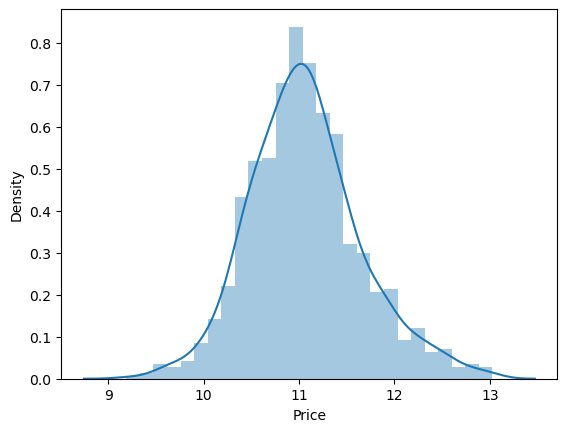

In [12]:
sns.distplot(laptop_df['Price'])

In [13]:
# returns the unique vavlues in the Datasets
def returns_the_unique_values_in_dataset(dataset,columns):
    unique_value_columns = []
    for column in columns:
        if len(dataset[column].unique()) == dataset.shape[0]:
            unique_value_columns.append(column)
    return unique_value_columns
returns_the_unique_values_in_dataset(laptop_df,laptop_df.columns)

['index', 'Model']

In [14]:
# From the above function we conclude that index and model are unique number so we will elemintate those from dataset
laptop_df.drop(columns = ['index','Model'],inplace = True)

In [16]:
continious_columns = [column for column in laptop_df.columns if laptop_df[column].dtypes != 'object']
continious_columns.remove('Price')
continious_columns.remove('Rating')
continious_columns

['num_cores',
 'num_threads',
 'ram_memory',
 'primary_storage_capacity',
 'secondary_storage_capacity',
 'is_touch_screen',
 'display_size',
 'resolution_width',
 'resolution_height']

In [21]:
# find the corelation between the Input Features and Output for the continious Features
corelation = np.corrcoef(laptop_df['Rating'],laptop_df['Price'])[0,1]
if corelation < 0.05 : 
    print('Corelated')
else:
    print('Not Corelated') # so we will drop the Rating columns from the Data Set

Not Corelated


In [22]:
laptop_df.drop(columns = 'Rating',inplace = True)

In [18]:
# Conver the input fetures continious into catogoriacl 
for column in continious_columns:
    laptop_df[column] = laptop_df[column].astype('object')

In [19]:
# To Identify the corelation between catogorical Variables and output Sales Price
final_columns = [column for column in laptop_df.columns if column != 'Price'] 
def Anova(dataset,columns):
    Corelated_or_not_columns = {}
    for column in columns:
        categories = list(dataset[column].value_counts().index)
        p_values = f_oneway(*[laptop_df[laptop_df[column] == cat]['Price'] for cat in categories])[1]
        if p_values < 0.05:
            Corelated_or_not_columns[column] = 'Co-related'
        else:
            Corelated_or_not_columns[column] = 'Not Co-related'
    return Corelated_or_not_columns
Anova(laptop_df,final_columns) # here we came to know that all the Input Featues are coreletad so No need to eliminate any input features

{'brand': 'Co-related',
 'processor_brand': 'Co-related',
 'processor_tier': 'Co-related',
 'num_cores': 'Co-related',
 'num_threads': 'Co-related',
 'ram_memory': 'Co-related',
 'primary_storage_type': 'Co-related',
 'primary_storage_capacity': 'Co-related',
 'secondary_storage_type': 'Not Co-related',
 'secondary_storage_capacity': 'Not Co-related',
 'gpu_brand': 'Co-related',
 'gpu_type': 'Co-related',
 'is_touch_screen': 'Co-related',
 'display_size': 'Co-related',
 'resolution_width': 'Co-related',
 'resolution_height': 'Co-related',
 'OS': 'Co-related',
 'year_of_warranty': 'Co-related'}

In [23]:
y = laptop_df['Price']

In [24]:
laptop_df.drop(columns = 'Price',inplace = True)

In [27]:
Label_encoding = LabelEncoder()
for column in laptop_df.columns:
    laptop_df[column] = Label_encoding.fit_transform(laptop_df[column])

In [29]:
# Saparate the Date of  
X_train,X_test,y_train,y_test = train_test_split(laptop_df,y, test_size= 0.2 , random_state= 1)

In [35]:
liner_reg = LinearRegression()

In [36]:
liner_reg.fit(X_train,y_train)

LinearRegression()

In [37]:
y_linear_reg_pred = liner_reg.predict(X_test)

In [38]:
r2_score(y_test,y_linear_reg_pred)

0.6775892012508735

In [41]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train,y_train)
y_decision_tree_pred = decision_tree.predict(X_test)

In [42]:
r2_score(y_test,y_decision_tree_pred)

0.6921173647497496

In [43]:
randomforest = RandomForestRegressor()
randomforest.fit(X_train,y_train)
y_randomforest_predict = randomforest.predict(X_test)
r2_score(y_test,y_randomforest_predict)

0.8188071202578077

In [44]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_knn_predict = knn.predict(X_test)
r2_score(y_test,y_knn_predict)

0.7612628872876871

In [45]:
# From the Above modle we came to know that random forest regressor is the best modle for the above data set 
# So we will deploy using Random Forest Regressor

In [46]:
filename = 'Laptop_Price_calcualtion.sav'

In [47]:
pickle.dump(randomforest,open(filename,'wb'))

In [48]:
#Load the Saved Model 
loded_model = pickle.load(open('Laptop_Price_calcualtion.sav','rb'))

In [50]:
loded_model.fit(X_train,y_train)

RandomForestRegressor()

In [52]:
outcomes = loded_model.predict(X_test)

In [54]:
r2_score(y_test,outcomes)

0.8135755905195124